In [123]:
# Electric Vehicle Population

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_main = pd.read_csv('Electric_Vehicle_Population_Data.csv', encoding='UTF8')

In [6]:
df_main.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,150479.000000,150482.000000,150482.000000,150482.000000,150141.000000,1.504820e+05,1.504790e+05
mean,98168.344154,2020.005436,67.877839,1312.644735,29.343950,2.111122e+08,5.297195e+10
std,2473.612184,3.015209,96.230009,9231.310215,14.824829,8.196388e+07,1.638841e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693473e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150306e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399119e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [15]:
null_summary = df_main.isnull().sum()
print(null_summary)

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [16]:
has_null = df_main.isnull().values.any()
print(has_null)

True


In [17]:
null_rows = df_main[df_main.isnull().any(axis=1)]
print(null_rows)

        VIN (1-10)     County           City State  Postal Code  Model Year  \
63985   KNDCD3LD6N      Marin     San Rafael    CA      94901.0        2022   
76254   WA11AAGE5P       Lake   Libertyville    IL      60048.0        2023   
77059   2C4RC1N72J    Douglas          Omaha    NE      68135.0        2018   
78462   5YJYGDED0M  San Diego      San Diego    CA      92131.0        2021   
80649   5YJYGDEF3L     Platte    Platte City    MO      64079.0        2020   
...            ...        ...            ...   ...          ...         ...   
150138  JTDKN3DP2E   Honolulu       Honolulu    HI      96818.0        2014   
150143  JTMEB3FV8P  Frederick     Middletown    MD      21769.0        2023   
150161  5YJ3E1EA0L  San Diego    Chula Vista    CA      91913.0        2020   
150179  1C4JJXP69M   Honolulu      Ewa Beach    HI      96706.0        2021   
150473  YV4BR0CZ5N     Howard  Ellicott City    MD      21042.0        2022   

            Make          Model                   E

In [18]:
null_columns = df_main.columns[df_main.isnull().any()]
for col in null_columns:
      print(col)

County
City
Postal Code
Legislative District
Vehicle Location
Electric Utility
2020 Census Tract


In [19]:
df_main.fillna('Unknown', inplace=True)

/var/folders/_6/pkkb2pfn30l079zw13jmkcd80000gn/T/ipykernel_73958/1282609502.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_main.fillna('Unknown', inplace=True)


In [26]:
print('All column names')
for col in df_main:
      print(col)

All column names
VIN (1-10)
County
City
State
Postal Code
Model Year
Make
Model
Electric Vehicle Type
Clean Alternative Fuel Vehicle (CAFV) Eligibility
Electric Range
Base MSRP
Legislative District
DOL Vehicle ID
Vehicle Location
Electric Utility
2020 Census Tract


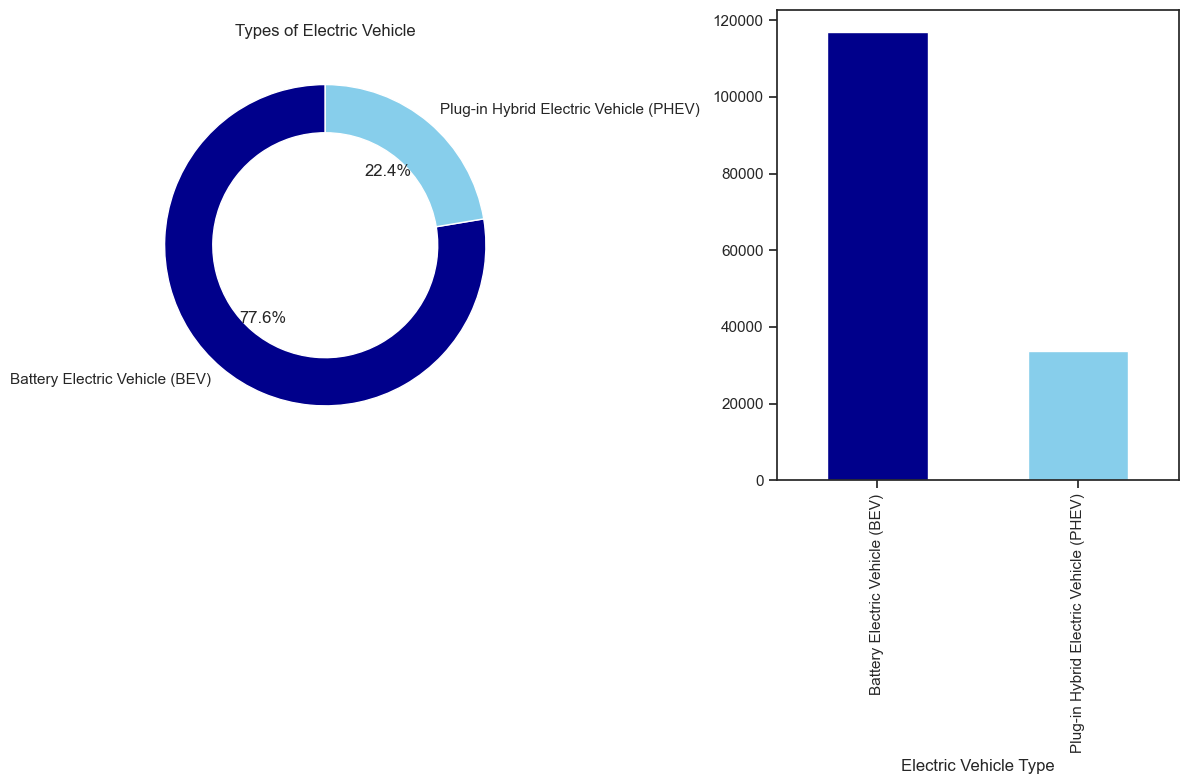

In [124]:
electric_type = df_main['Electric Vehicle Type'].value_counts()
color = ['darkblue', 'skyblue']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.pie(electric_type, labels=electric_type.index, autopct="%1.1f%%", colors = color, startangle=90, wedgeprops={'width': 0.3})
ax1.set_title('Types of Electric Vehicle')

electric_type.plot(kind='bar', color=color)

fig.tight_layout()
plt.savefig('electric_type.png')
plt.show()

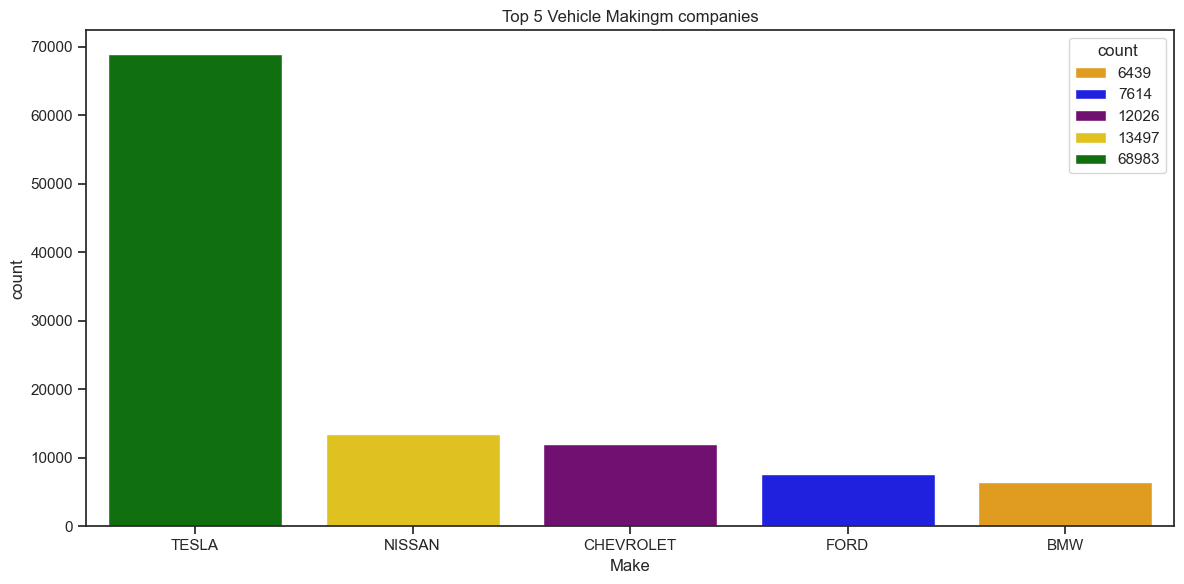

In [133]:
making_comp = df_main['Make'].value_counts().head(5)
making_comp = making_comp.reset_index(name='count')

custome_color = ['orange', 'blue', 'purple', 'gold', 'green']
plt.figure(figsize=(12,6))
sns.set_theme(style='ticks')
sns.barplot(data=making_comp, x='Make', y='count', hue='count', palette=custome_color)
plt.title('Top 5 Vehicle Makingm companies')
plt.tight_layout()
plt.savefig('top_5makingcomp.png')
plt.show()

/var/folders/_6/pkkb2pfn30l079zw13jmkcd80000gn/T/ipykernel_73958/2855828538.py:8: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_county, x='County', y='count', hue='count', palette=custome_color)


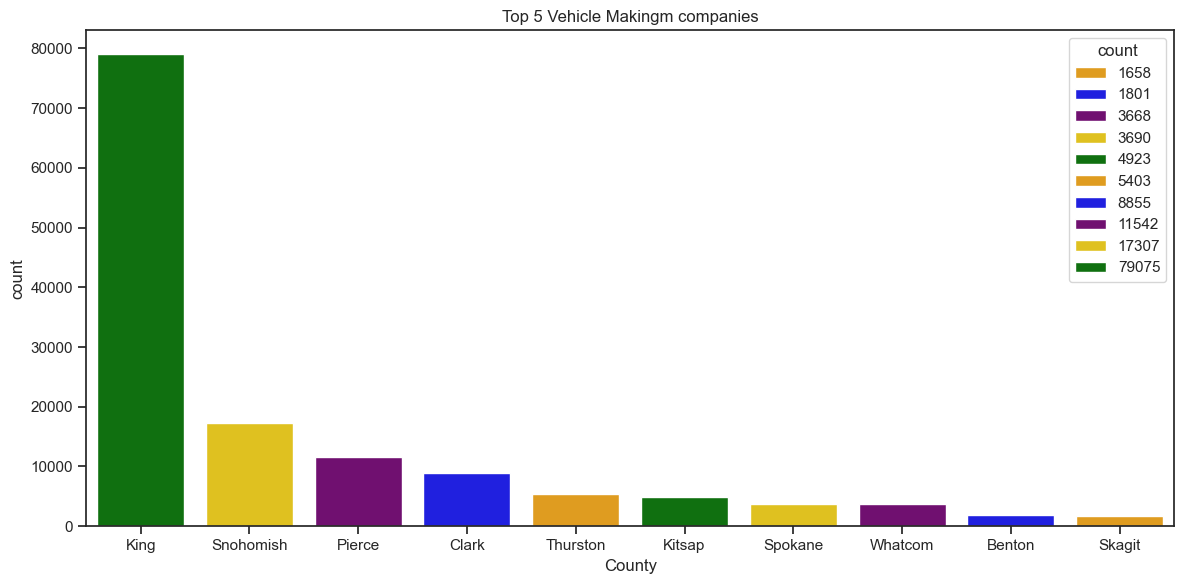

In [125]:
top_county = df_main['County'].value_counts().head(10)
top_county = top_county.reset_index(name='count')


custome_color = ['orange', 'blue', 'purple', 'gold', 'green']
plt.figure(figsize=(12,6))
sns.set_theme(style='ticks')
sns.barplot(data=top_county, x='County', y='count', hue='count', palette=custome_color)
plt.title('Top 5 Vehicle Makingm companies')
plt.tight_layout()
plt.savefig('Vehicle_making.png')
plt.show()


/var/folders/_6/pkkb2pfn30l079zw13jmkcd80000gn/T/ipykernel_73958/335480211.py:5: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=count_king_data, x='Make', y='count', hue='count', palette=custome_color)


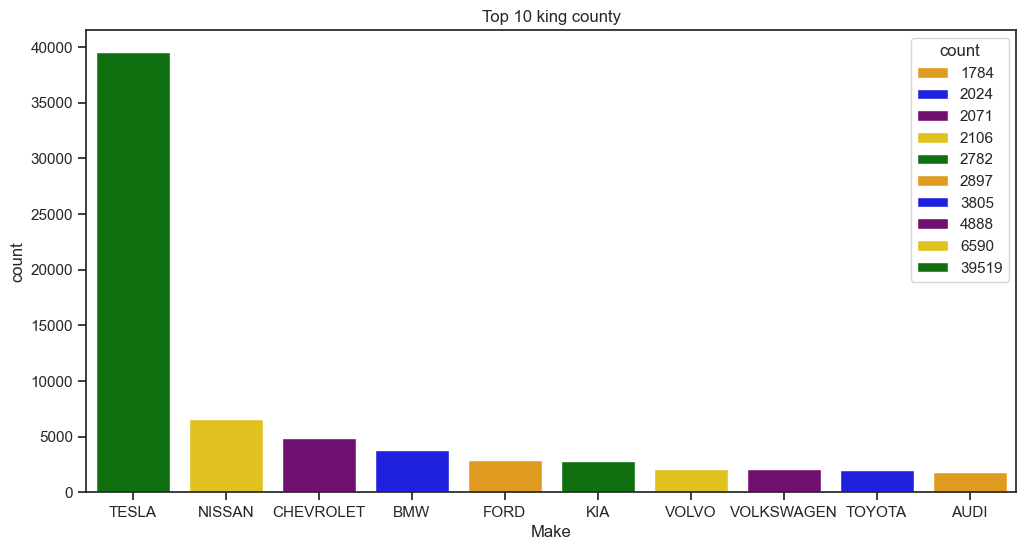

In [132]:
king_data = df_main[df_main['County'] == 'King']
custome_color = ['orange', 'blue', 'purple', 'gold', 'green']
count_king_data = king_data['Make'].value_counts().head(10).reset_index(name='count')
plt.figure(figsize=(12,6))
sns.barplot(data=count_king_data, x='Make', y='count', hue='count', palette=custome_color)
plt.title('Top 10 king county')
plt.savefig('king_data.png')
plt.show()

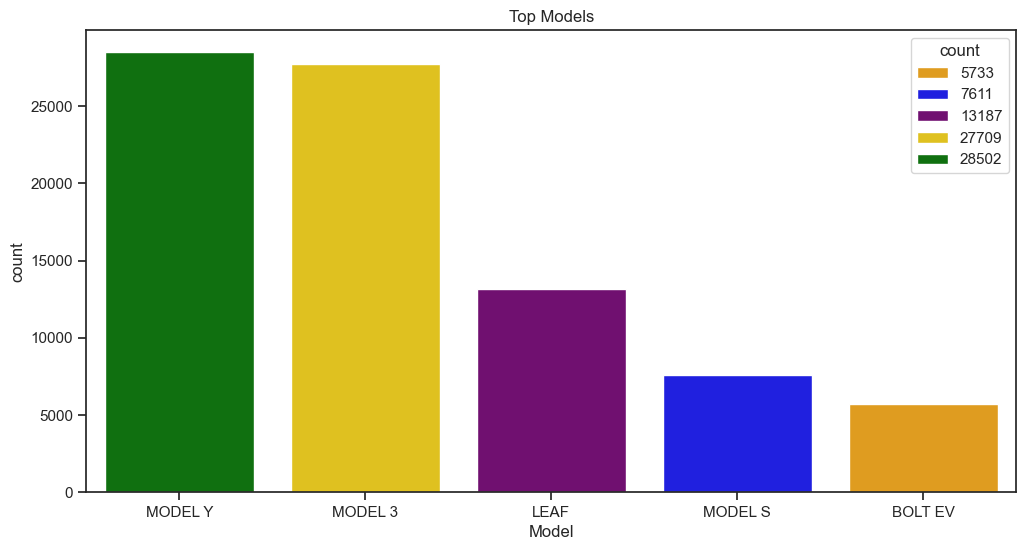

In [126]:
make_models = df_main['Model'].value_counts().head(5).reset_index(name='count')
make_models
custome_color = ['orange', 'blue', 'purple', 'gold', 'green']
plt.figure(figsize=(12,6))
sns.barplot(data=make_models, x='Model', y='count', hue='count', palette=custome_color)
plt.title('Top Models')
plt.savefig('make_models.png')
plt.show()

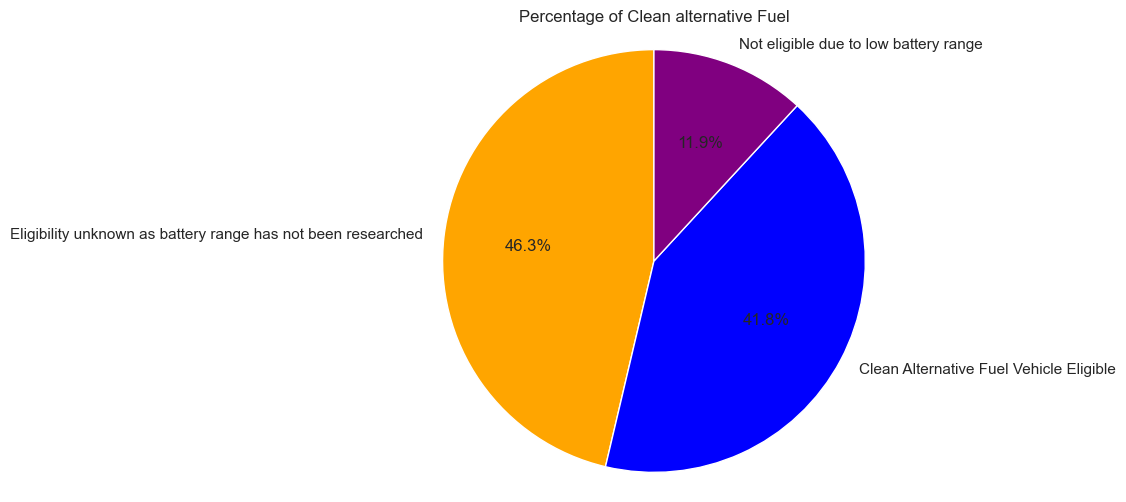

In [130]:
fuel_alt = df_main['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_alt, labels=fuel_alt.index, autopct='%1.1f%%',startangle= 90,  colors=custome_color)
plt.title('Percentage of Clean alternative Fuel')
plt.axis('equal')
plt.savefig('clean_fuel.png')
plt.show()

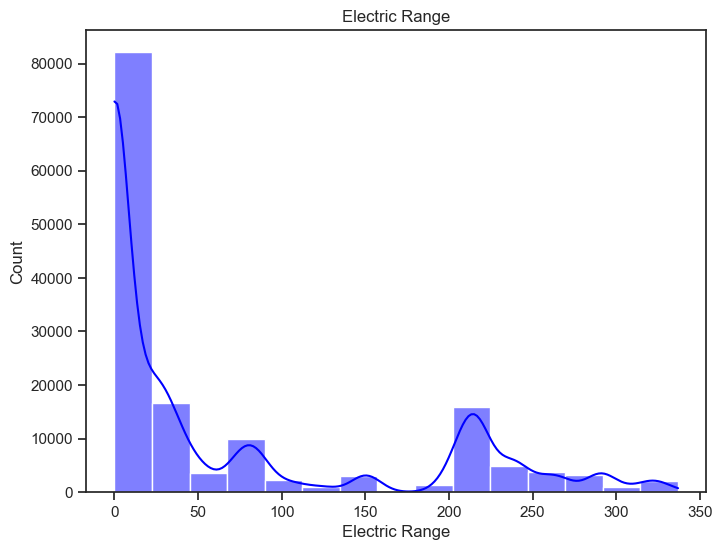

In [131]:
electric_range = df_main['Electric Range']
plt.figure(figsize=(8,6))
sns.histplot(data=electric_range, bins=15, kde=True, color='blue')
plt.title('Electric Range')
plt.ylabel('Count')
plt.xlabel('Electric Range')
plt.savefig('electric_range.png')
plt.show()
